In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import liana as li
import matplotlib.pyplot as plt
import scipy.sparse as sp



from matplotlib import colors
%matplotlib inline

from typing import Optional, Literal

In [ ]:
adata = sc.read("./citeseq_mdata_allsamples_filtered_fine_clustering.h5ad")

In [4]:
adata

AnnData object with n_obs × n_vars = 106315 × 3342
    obs: 'rna:donor_id', 'rna:sample_id', 'rna:tissue', 'rna:batch', 'rna:n_genes_by_counts', 'rna:total_counts', 'rna:total_counts_mt', 'rna:pct_counts_mt', 'rna:total_counts_ribo', 'rna:pct_counts_ribo', 'rna:S_score', 'rna:G2M_score', 'rna:phase', 'rna:leiden_wnn', 'rna:celltype_wnn', 'rna:celltype_hires', 'rna:celltype_lores', 'prot:donor_id', 'prot:sample_id', 'prot:tissue', 'prot:batch', 'prot:leiden_wnn', 'prot:total_counts', 'prot:celltype_hires', 'rna:mod_weight', 'prot:mod_weight', 'leiden_wnn', 'tissue', 'donor_id', 'total_counts', 'celltype_wnn', 'celltype_hires', 'celltype_lores', 'gest_day', 'fetal_sex', 'gravida', 'mat_age'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltype_hires_colors', 'dendrogram_celltype_hires', 'dendrogram_leiden_wnn', 'hvg', '

In [5]:
print(adata.raw)

Raw AnnData with n_obs × n_vars = 106315 × 32536
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'


In [6]:
li.mt.show_methods()


,Method Name,Magnitude Score,Specificity Score,Reference
0,CellPhoneDB,lr_means,cellphone_pvals,"Efremova, M., Vento-Tormo, M., Teichmann, S.A...."
0,Connectome,expr_prod,scaled_weight,"Raredon, M.S.B., Yang, J., Garritano, J., Wang..."
0,log2FC,None,lr_logfc,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,NATMI,expr_prod,spec_weight,"Hou, R., Denisenko, E., Ong, H.T., Ramilowski,..."
0,SingleCellSignalR,lrscore,None,"Cabello-Aguilar, S., Alame, M., Kon-Sun-Tack, ..."
0,Rank_Aggregate,magnitude_rank,specificity_rank,"Dimitrov, D., Türei, D., Garrido-Rodriguez, M...."
0,Geometric Mean,lr_gmeans,gmean_pvals,CellPhoneDBv2's permutation approach applied t...
0,scSeqComm,inter_score,None,"Baruzzo, G., Cesaro, G., Di Camillo, B. 2022. ..."
0,CellChat,lr_probs,cellchat_pvals,"Jin, S., Guerrero-Juarez, C.F., Zhang, L., Cha..."


In [7]:
from liana.mt import rank_aggregate
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean

In [8]:
adata.obs['celltype_midres'] = adata.obs['celltype_hires']

In [9]:
adata.obs['celltype_midres'] = adata.obs['celltype_midres'].replace({
    'Tcell_CD4+blood': 'T_CD4+',
    'Tcell_CD4+cyto': 'T_CD4+',
    'Tcell_CD4+exh': 'T_CD4+',
    'Tcell_CD4+prol': 'T_CD4+',
    'Tcell_CD4+tr': 'T_CD4+',
    'Tcell_CD8+blood': 'T_CD8+',
    'Tcell_CD8+eff': 'T_CD8+',
    'Tcell_CD8+prol': 'T_CD8+',
    'Tcell_CD8+tr': 'T_CD8+',
    'MAITcell':'T_CD8+',
    'Tcell_reg': 'Treg',
    'DC1_prol': 'DC1',
    'DC2_prol': 'DC2',
    'CD39-CD103+ NK':'CD39- NK'
})

In [10]:
adata = adata[~adata.obs['celltype_midres'].isin(['CCT','vCTB','STB'])]

In [11]:
adata.obs['celltype_midres'].cat.categories

Index(['BCell', 'DC1', 'DC2', 'ENDO', 'EVT', 'EpiCell', 'ILC', 'Lymphatic',
       'trMac', 'inflaMac', 'tiMac', 'pMac', 'T_CD8+', 'MAST', 'MURAL',
       'CD16+ Mono', 'NK_CD16+', 'CD39+ NK', 'CD39- NK', 'pNK', 'PLASMA',
       'T_CD4+', 'Tcell_gd', 'Treg', 'actMac', 'decFib', 'hpFib', 'Mono'],
      dtype='object')

/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/scanpy/plotting/_utils.py:432: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


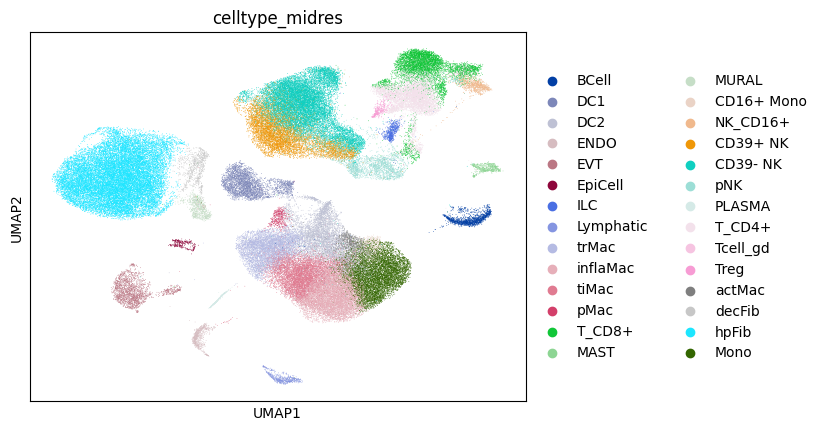

In [12]:
sc.pl.umap(adata, color='celltype_midres')

In [13]:
resource = li.rs.select_resource('consensus')
resource.head()

,ligand,receptor
0,LGALS9,PTPRC
1,LGALS9,MET
2,LGALS9,CD44
3,LGALS9,LRP1
4,LGALS9,CD47


In [14]:
resource

,ligand,receptor
0,LGALS9,PTPRC
1,LGALS9,MET
2,LGALS9,CD44
3,LGALS9,LRP1
4,LGALS9,CD47
...,...,...
4619,BMP2,ACTR2
4620,BMP15,ACTR2
4621,CSF1,CSF3R
4622,IL36G,IFNAR1


In [15]:
resource[resource['ligand'] == "IFNG"]

,ligand,receptor
1723,IFNG,IFNGR1_IFNGR2
4555,IFNG,MPL


In [16]:
new_pairs = pd.DataFrame({
    'ligand': ['PTGES'] * 4,
    'receptor': ['PTGER1', 'PTGER2', 'PTGER3', 'PTGER4']
})

# 2. Append them to your existing df
resource = pd.concat([resource, new_pairs], ignore_index=True)

In [17]:
new_pairs = pd.DataFrame({
    'ligand': ['HSD11B1'],
    'receptor': ['NR3C1']
})

# 2. Append them to your existing df
resource = pd.concat([resource, new_pairs], ignore_index=True)

In [18]:
new_pairs = pd.DataFrame({
    'ligand': ['GDF15'],
    'receptor': ['ITGAL']
})

# 2. Append them to your existing df
resource = pd.concat([resource, new_pairs], ignore_index=True)

In [19]:
resource

,ligand,receptor
0,LGALS9,PTPRC
1,LGALS9,MET
2,LGALS9,CD44
3,LGALS9,LRP1
4,LGALS9,CD47
...,...,...
4625,PTGES,PTGER2
4626,PTGES,PTGER3
4627,PTGES,PTGER4
4628,HSD11B1,NR3C1


In [ ]:
raw = adata.raw


gene = 'ARG1'
if gene not in raw.var_names:
    raise KeyError(f"{gene!r} not found in raw.var_names")
gi = raw.var_names.get_loc(gene)


fn1_vec = raw.X[:, gi]


if sp.issparse(fn1_vec):
    fn1_arr = fn1_vec.toarray().ravel()
else:
    fn1_arr = fn1_vec.ravel()


fn1_series = pd.Series(fn1_arr, index=adata.obs_names, name='FN1_raw')


df = adata.obs[['celltype_midres']].join(fn1_series)


mean_by_type = df.groupby('celltype_midres')['FN1_raw'].mean()

print(mean_by_type)

celltype_midres
BCell         0.000000
DC1           0.000267
DC2           0.000913
ENDO          0.000000
EVT           0.000382
EpiCell       0.000000
ILC           0.003747
Lymphatic     0.000900
trMac         0.000387
inflaMac      0.000225
tiMac         0.000587
pMac          0.000000
T_CD8+        0.002034
MAST          0.000000
MURAL         0.000607
CD16+ Mono    0.000000
NK_CD16+      0.001024
CD39+ NK      0.000682
CD39- NK      0.000973
pNK           0.000971
PLASMA        0.000000
T_CD4+        0.002288
Tcell_gd      0.000000
Treg          0.013669
actMac        0.000000
decFib        0.236453
hpFib         0.001397
Mono          0.000870
Name: FN1_raw, dtype: float32


In [21]:
print(adata.raw.X)

  (0, 23)	1.5425436
  (0, 36)	2.1226137
  (0, 37)	2.1226137
  (0, 79)	1.5425436
  (0, 97)	1.5425436
  (0, 182)	1.5425436
  (0, 190)	1.5425436
  (0, 193)	2.1226137
  (0, 233)	1.5425436
  (0, 265)	1.5425436
  (0, 268)	1.5425436
  (0, 365)	1.5425436
  (0, 367)	1.5425436
  (0, 373)	2.1226137
  (0, 379)	1.5425436
  (0, 402)	1.5425436
  (0, 403)	1.5425436
  (0, 419)	1.5425436
  (0, 440)	1.5425436
  (0, 448)	2.7540352
  (0, 453)	1.5425436
  (0, 470)	1.5425436
  (0, 477)	1.5425436
  (0, 486)	2.7540352
  (0, 489)	1.5425436
  :	:
  (105359, 31818)	1.7496957
  (105359, 31902)	1.7496957
  (105359, 31923)	1.7496957
  (105359, 31958)	1.7496957
  (105359, 31983)	2.3519182
  (105359, 31999)	1.7496957
  (105359, 32002)	1.7496957
  (105359, 32019)	1.7496957
  (105359, 32029)	1.7496957
  (105359, 32039)	2.7251403
  (105359, 32045)	1.7496957
  (105359, 32088)	1.7496957
  (105359, 32119)	2.3519182
  (105359, 32159)	2.9963024
  (105359, 32216)	2.7251403
  (105359, 32220)	2.7251403
  (105359, 32225)	2.351918

In [ ]:
cellphonedb(adata,
            groupby='celltype_midres',
            resource = resource,
            expr_prop=0.20,
            verbose=True, key_added='cpdb_res')

Using `.raw`!


Using provided `resource`.


109 features of mat are empty, they will be removed.
/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/liana/method/_pipe_utils/_pre.py:150: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
0.03 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 105360 samples and 1819 features


100%|██████████| 1000/1000 [03:44<00:00,  4.46it/s]


In [23]:
adata.uns['cpdb_res'].head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
123201,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.420077,0.976229,EVT,Mono,4.785870,0.0
74965,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.344757,0.973926,EVT,CD16+ Mono,4.748210,0.0
44152,FN1,FN1,6.151663,0.997914,CD44,CD44,3.323814,0.993594,EVT,inflaMac,4.737739,0.0
106102,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.313986,0.991443,EVT,actMac,4.732824,0.0
44351,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.284569,0.991614,EVT,inflaMac,4.718116,0.0


In [24]:
adata.uns['cpdb_res']

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals
123201,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.420077,0.976229,EVT,Mono,4.785870,0.000
74965,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.344757,0.973926,EVT,CD16+ Mono,4.748210,0.000
44152,FN1,FN1,6.151663,0.997914,CD44,CD44,3.323814,0.993594,EVT,inflaMac,4.737739,0.000
106102,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.313986,0.991443,EVT,actMac,4.732824,0.000
44351,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.284569,0.991614,EVT,inflaMac,4.718116,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...
111783,VEGFA,VEGFA,0.139547,0.219499,ITGB3,ITGB3,0.127448,0.211679,EVT,decFib,0.133497,1.000
22699,COL27A1,COL27A1,0.125294,0.210462,ITGA2,ITGA2_ITGB1,0.137754,0.220542,decFib,EVT,0.131524,0.000
112111,FADD,FADD,0.124627,0.212230,FAS,FAS,0.133383,0.210462,EpiCell,decFib,0.129005,0.665
115695,ADAM15,ADAM15,0.106353,0.200730,ITGB3,ITGB3,0.127448,0.211679,decFib,decFib,0.116900,0.000


In [ ]:
df = adata.uns['cpdb_res']


raw = adata.raw
celltypes = adata.obs['celltype_midres']  

genes = pd.unique(df[['ligand','receptor']].values.ravel())

scaled_means = {}
for g in genes:
    if g not in raw.var_names:
        raise KeyError(f"{g!r} not found in adata.raw.var_names")
    gi = raw.var_names.get_loc(g)
    vec = raw.X[:, gi]
    arr = vec.toarray().ravel() if sp.issparse(vec) else vec.ravel()
    # mean per cell type
    means = pd.Series(arr, index=celltypes).groupby(level=0).mean()
    # min–max scale
    scaled = (means - means.min()) / (means.max() - means.min())
    scaled_means[g] = scaled


adata.uns['cpdb_res']['ligand_scaled_means']   = df.apply(lambda row: scaled_means[row['ligand']].loc[row['source']],   axis=1)
adata.uns['cpdb_res']['receptor_scaled_means'] = df.apply(lambda row: scaled_means[row['receptor']].loc[row['target']], axis=1)

In [26]:
df = adata.uns['cpdb_res']

df[df['ligand'].isin(['PTGES','HSD11B1','IFNG','GDF15'])]

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals,ligand_scaled_means,receptor_scaled_means
33216,GDF15,GDF15,1.916005,0.823775,TGFBR2,TGFBR2,1.620072,0.914234,EVT,Lymphatic,1.768039,0.0,1.000000,1.000000
12940,GDF15,GDF15,1.916005,0.823775,TGFBR2,TGFBR2,1.399299,0.846847,EVT,ENDO,1.657652,0.0,1.000000,0.857764
33512,GDF15,GDF15,1.246426,0.647482,TGFBR2,TGFBR2,1.620072,0.914234,EpiCell,Lymphatic,1.433249,0.0,0.650534,1.000000
93875,GDF15,GDF15,1.916005,0.823775,TGFBR2,TGFBR2,0.936333,0.639535,EVT,PLASMA,1.426169,0.0,1.000000,0.559492
97012,PTGES,PTGES,1.711431,0.881126,PTGER4,PTGER4,1.131782,0.607028,EVT,T_CD4+,1.421606,0.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11227,PTGES,PTGES,0.291084,0.302920,PTGER2,PTGER2,0.186441,0.222300,decFib,DC2,0.238763,0.0,0.170082,0.405405
21423,PTGES,PTGES,0.285514,0.200920,PTGER3,PTGER3,0.191958,0.299270,CD16+ Mono,EVT,0.238736,0.0,0.166828,0.746582
9440,PTGES,PTGES,0.285514,0.200920,PTGER2,PTGER2,0.186441,0.222300,CD16+ Mono,DC2,0.235978,0.0,0.166828,0.405405
5165,PTGES,PTGES,0.291084,0.302920,PTGER2,PTGER2,0.150908,0.204366,decFib,DC1,0.220996,0.0,0.170082,0.326178


In [27]:
adata.uns['cpdb_res'].head()

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals,ligand_scaled_means,receptor_scaled_means
123201,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.420077,0.976229,EVT,Mono,4.785870,0.0,1.0,1.000000
74965,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.344757,0.973926,EVT,CD16+ Mono,4.748210,0.0,1.0,0.977581
44152,FN1,FN1,6.151663,0.997914,CD44,CD44,3.323814,0.993594,EVT,inflaMac,4.737739,0.0,1.0,1.000000
106102,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.313986,0.991443,EVT,actMac,4.732824,0.0,1.0,0.968422
44351,FN1,FN1,6.151663,0.997914,PLAUR,PLAUR,3.284569,0.991614,EVT,inflaMac,4.718116,0.0,1.0,0.959667


In [ ]:
import plotnine as p9
from typing import Union, List, Tuple
import anndata as ad
import pandas as pd

from liana.plotting._common import _prep_liana_res, _get_top_n, _check_var, _filter_by
from liana._docs import d
from liana._constants import Keys as K, DefaultValues as V

@d.dedent
def tileplot(adata: ad.AnnData = None,
             liana_res: pd.DataFrame = None,
             fill: str = None,
             label: str = None,
             label_fun: callable = None,
             source_labels: Union[str, List[str]] = None,
             target_labels: Union[str, List[str]] = None,
             ligand_complex: Union[str, List[str]] = None,
             receptor_complex: Union[str, List[str]] = None,
             uns_key: str = K.uns_key,
             top_n: int = None,
             orderby: str = None,
             orderby_ascending: bool = False,
             orderby_absolute: bool = True,
             filter_fun: callable = None,
             source_title=None,
             target_title=None,
             cmap: str = V.cmap,
             figure_size: Tuple[float, float] = (5, 5),
             label_size: int = 12,  # (Unused in this version)
             return_fig: bool = V.return_fig
             ):
    """
    Tileplot interactions by source and target cells, now displaying the props values as circles.
    The bubble fill color reflects the means values (using the `fill` column) while the bubble size
    reflects the props values (using the `label` column).

    Parameters
    ----------
    %(adata)s
    %(liana_res)s
    fill
        Column in `liana_res` to define the bubble fill (e.g., the means values).
    label
        Column in `liana_res` to define the bubble size (e.g., the props values).
    label_fun
        Callable to apply to the `label` column.
    %(source_labels)s
    %(target_labels)s
    %(ligand_complex)s
    %(receptor_complex)s
    %(uns_key)s
    %(top_n)s
    %(orderby)s
    %(orderby_ascending)s
    %(orderby_absolute)s
    %(filter_fun)s
    source_title
        Title for the source facet. Default is 'Source'.
    target_title
        Title for the target facet. Default is 'Target'.
    %(cmap)s
    label_size
        (Not used in this version; bubble size is determined by the `label` values.)
    %(figure_size)s
    %(return_fig)s

    Returns
    -------
    A `plotnine.ggplot` instance displaying bubbles where the fill color indicates the means value and
    the bubble size reflects the props value.
    """
    liana_res = _prep_liana_res(adata=adata,
                                liana_res=liana_res,
                                source_labels=source_labels,
                                target_labels=target_labels,
                                ligand_complex=ligand_complex,
                                receptor_complex=receptor_complex,
                                uns_key=uns_key)

    liana_res = _filter_by(liana_res, filter_fun)
    liana_res = _get_top_n(liana_res, top_n, orderby, orderby_ascending, orderby_absolute)

    relevant_cols = [col for col in liana_res.columns if col.endswith(fill) | col.endswith(label)]

    ligand_stats = _entity_stats(liana_res,
                                 entity='ligand',
                                 entity_type='source',
                                 relevant_cols=relevant_cols,
                                 type_title=source_title)

    _check_var(ligand_stats, var=fill, var_name='fill')
    _check_var(ligand_stats, var=label, var_name='label')

    receptor_stats = _entity_stats(liana_res,
                                   entity='receptor',
                                   entity_type='target',
                                   relevant_cols=relevant_cols,
                                   type_title=target_title)

    liana_res = pd.concat([ligand_stats, receptor_stats])

    if label_fun is not None:
        liana_res[label] = liana_res[label].apply(label_fun)


    p = (
        p9.ggplot(liana_res, p9.aes(x='cell_type', y='interaction')) +
        p9.geom_point(p9.aes(size=label, fill=fill), shape='o', color='white') +
        p9.facet_grid('~ type', scales='free') +
        p9.theme_bw(base_size=14) +
        p9.theme(
            axis_text_x=p9.element_text(angle=90),
            figure_size=figure_size,
            strip_background=p9.element_rect(colour="black", fill="#fdfff4"),
        ) +
        p9.scale_fill_cmap(
            cmap,
            limits=(0, 1),
            breaks=[0,0.25,0.5,0.75, 1]
        ) +
        p9.scale_size_continuous(range=(0, 10), limits=(0, 1)) +
        p9.labs(x='Cell type', y='Interaction', fill=str.capitalize(fill), size=str.capitalize(label))
    )

    if return_fig:
        return p

    p.draw()

def _entity_stats(liana_res, entity, entity_type, relevant_cols, type_title=None):
    entity_stats = liana_res[['interaction', f"{entity}_complex", entity_type, *relevant_cols]].copy()
    if type_title is None:
        type_title = entity_type.capitalize()
    entity_stats = entity_stats.rename(columns={entity_type: 'cell_type'}).assign(type=type_title)
    entity_stats.columns = entity_stats.columns.str.replace(entity + '_', '')
    return entity_stats


## Figure 5F

/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 8.25 in image.
/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: 20250624_liana_hubdissolution.svg
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


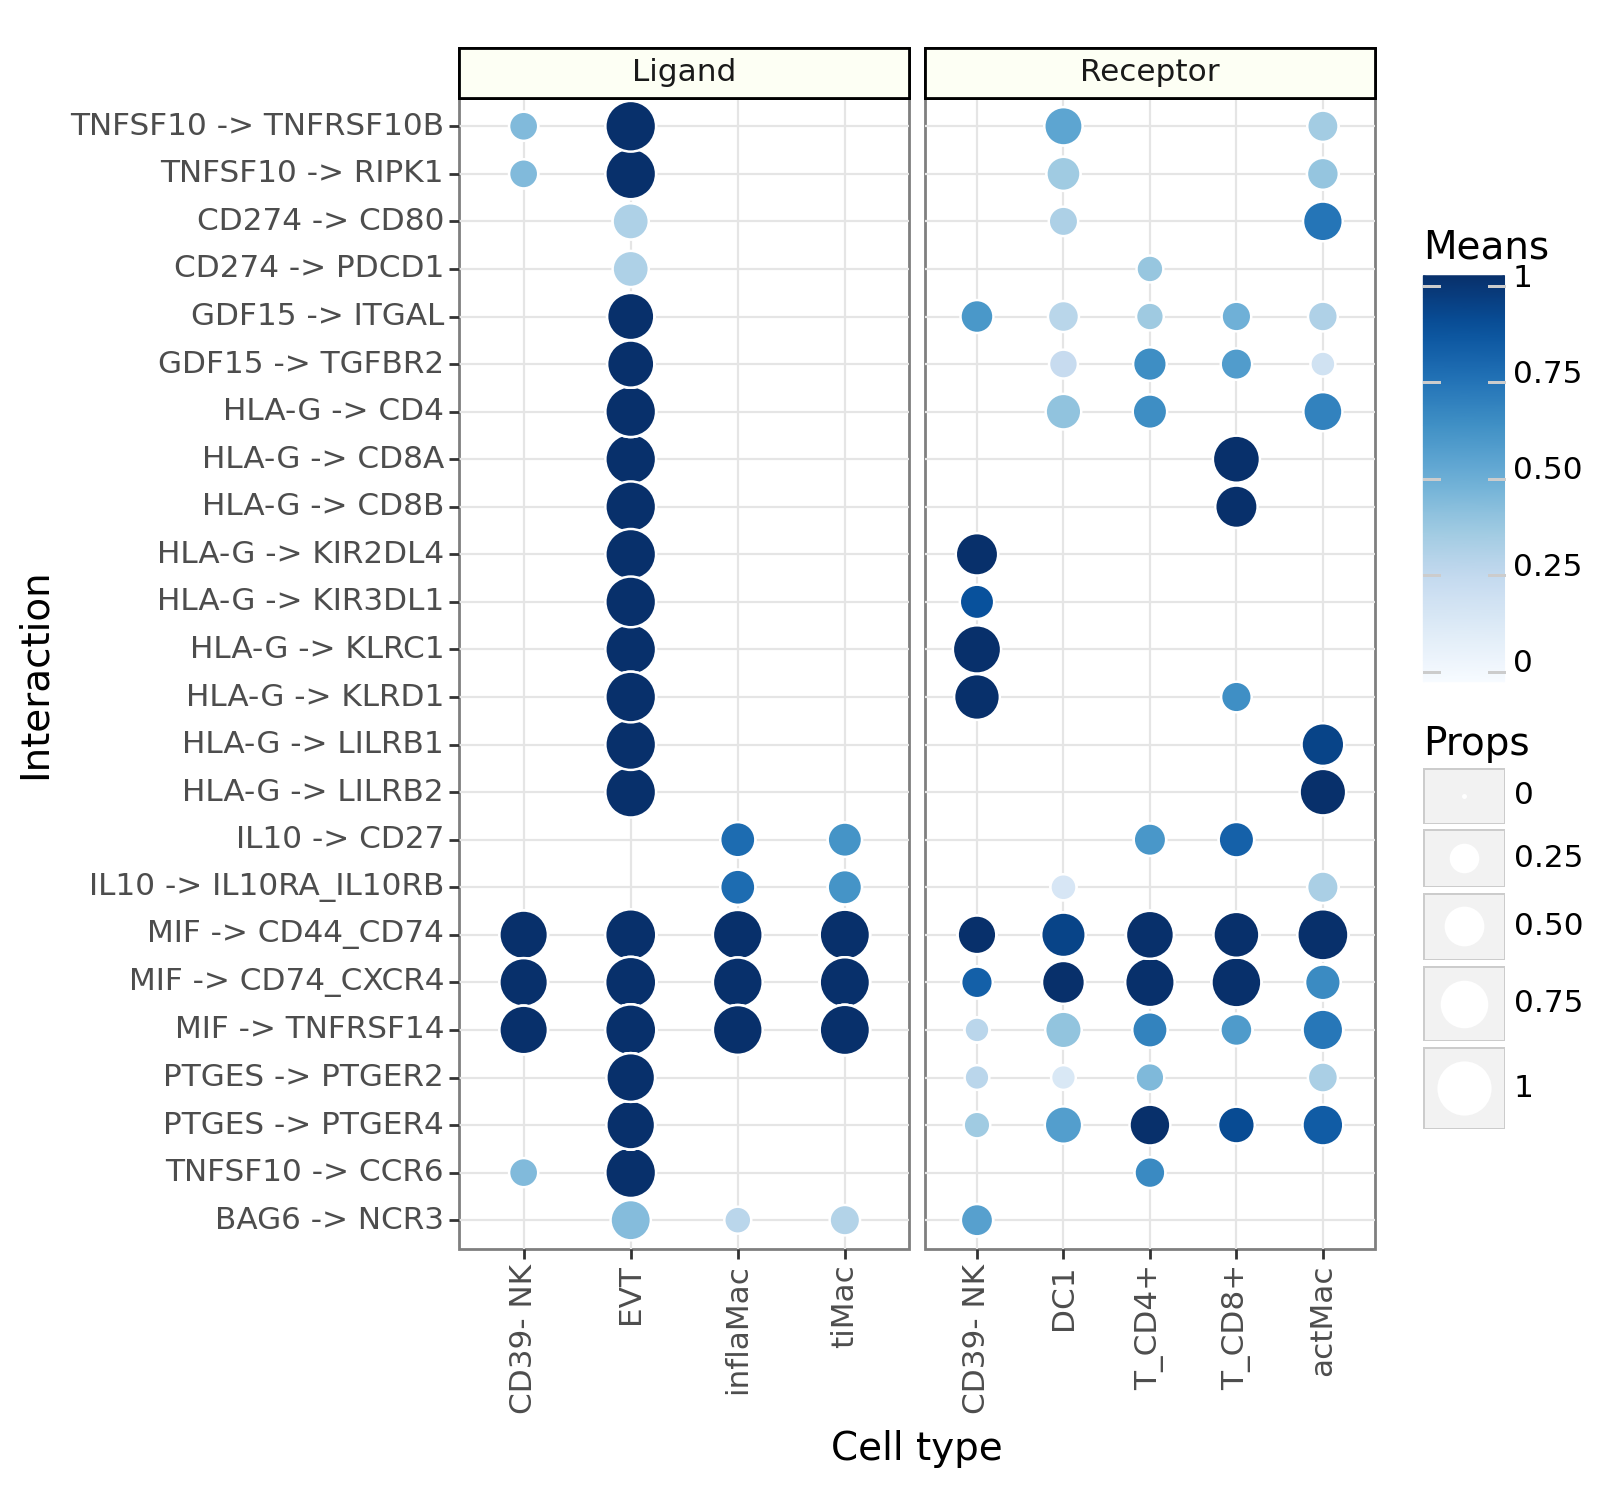

<Figure Size: (800 x 750)>

In [ ]:
my_plot = tileplot(
    adata=adata,
    # fill color represents the means values
    fill='means',
    # bubble size represents the props values
    label='props',
    #label_fun=lambda x: f'{x:.2f}',
    top_n=50,
    orderby='cellphone_pvals',
    cmap='Blues', 
    orderby_ascending=True,
    ligand_complex=['IL10', 'MIF', 'BAG6', 'PVR', 'CD274', 'PTGES', 'HLA-G', 'TNFSF10','GDF15'],
    source_labels=['CD39- NK', 'tiMac', 'inflaMac', 'EVT'],
    target_labels=['T_CD4+', 'T_CD8+', 'CD39- NK', 'DC1', 'actMac'],
    uns_key='cpdb_res', 
    source_title='Ligand',
    target_title='Receptor',
    figure_size=(8, 7.5)
)

my_plot.save("20250624_liana_hubdissolution.svg", format="svg", width=8, height=8.25, units="in")
my_plot

/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 8.25 in image.
/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: 20250624_liana_hubdissolution_all.svg
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


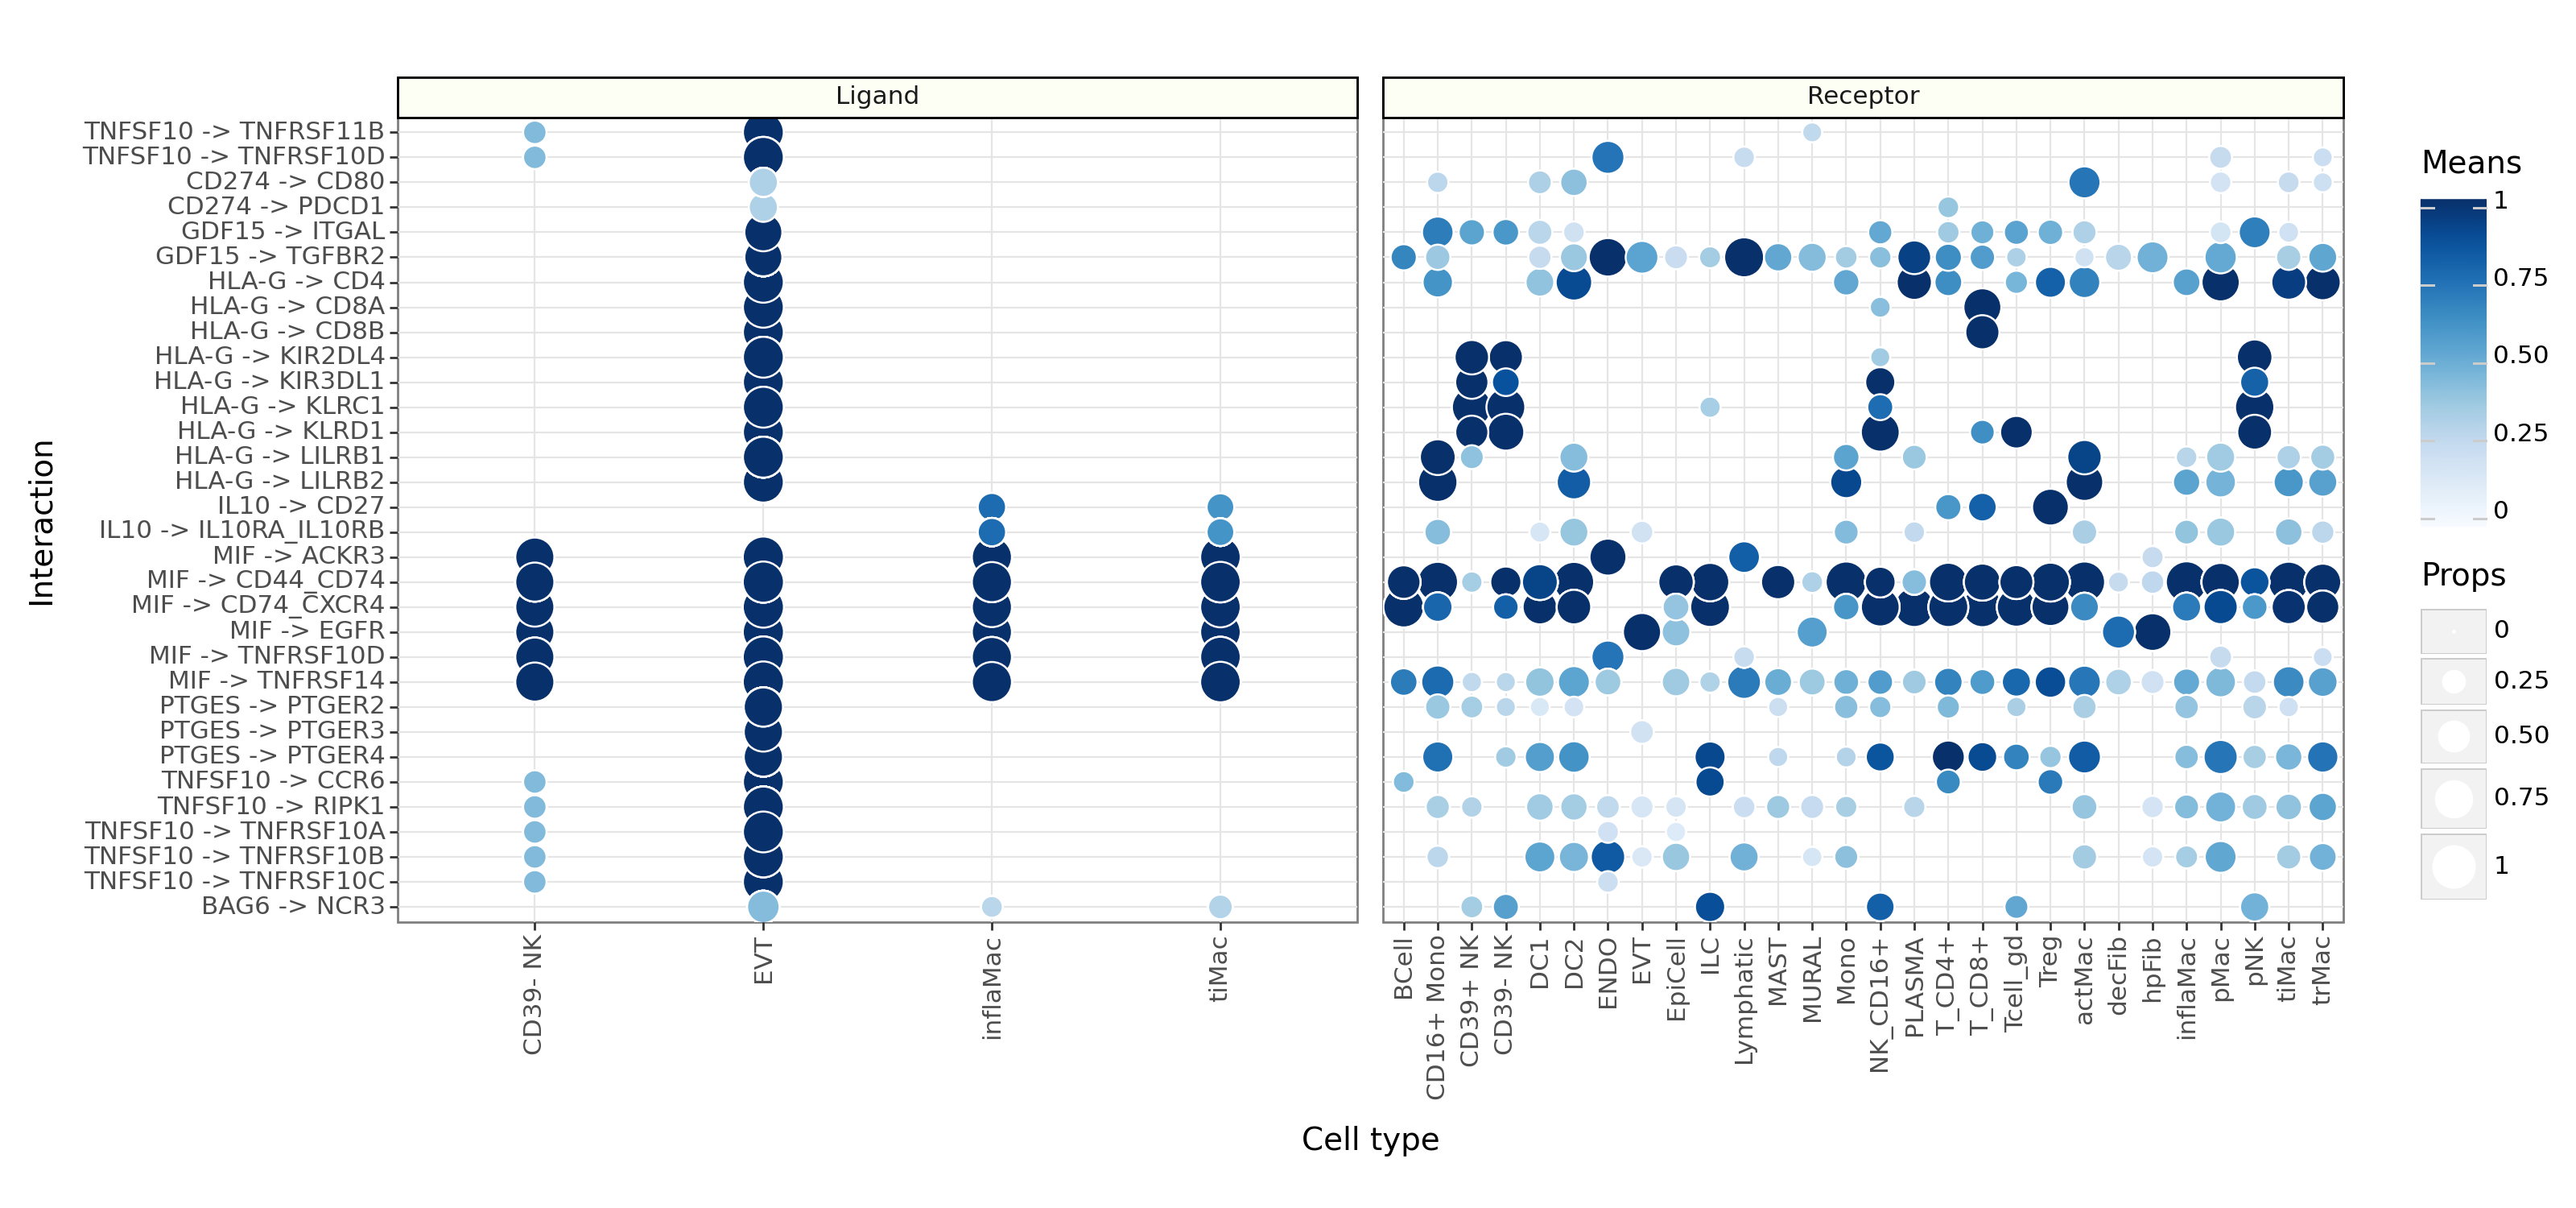

<Figure Size: (1600 x 750)>

In [31]:
my_plot = tileplot(
    adata=adata,
    # fill color represents the means values
    fill='means',
    # bubble size represents the props values
    label='props',
    #label_fun=lambda x: f'{x:.2f}',
    top_n=50,
    orderby='cellphone_pvals',
    cmap='Blues', 
    orderby_ascending=True,
    ligand_complex=['IL10', 'MIF', 'BAG6', 'PVR', 'CD274', 'PTGES', 'HLA-G', 'TNFSF10','GDF15'],
    source_labels=['CD39- NK', 'tiMac', 'inflaMac', 'EVT'],
    #target_labels=['T_CD4+', 'T_CD8+', 'CD39- NK', 'DC1', 'actMac'],
    uns_key='cpdb_res',  # NOTE: default is 'liana_res'
    # Optionally, you can use a filter function to limit rows (uncomment if desired)
    # filter_fun=lambda x: (x['ligand_props'] > 0.25) and (x['receptor_props'] > 0.25),
    source_title='Ligand',
    target_title='Receptor',
    figure_size=(16, 7.5)
)

my_plot.save("20250624_liana_hubdissolution_all.svg", format="svg", width=8, height=8.25, units="in")
my_plot

/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 8.25 in image.
/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: 20250624_liana_hubdissolution.svg
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


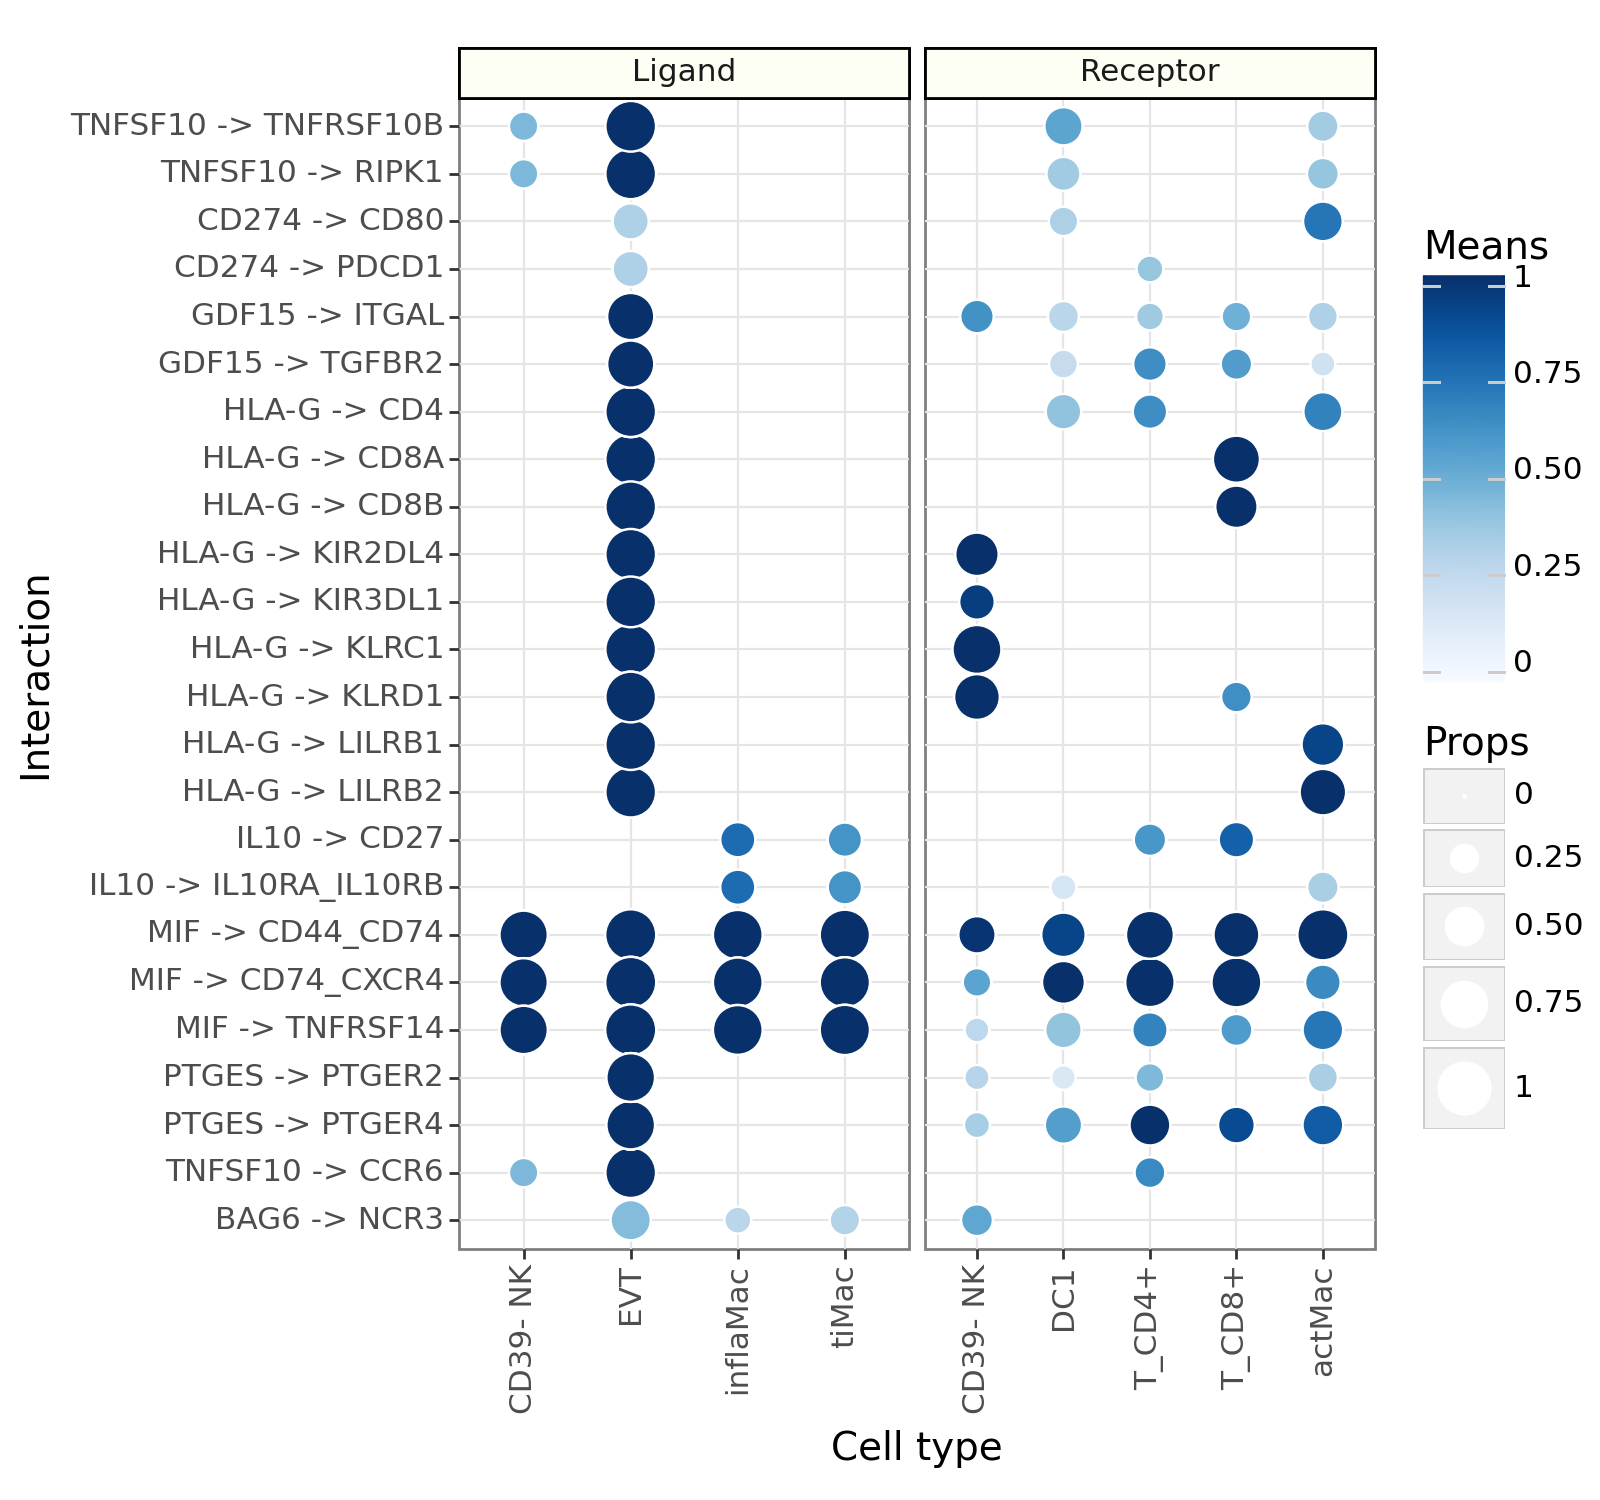

<Figure Size: (800 x 750)>

In [31]:
my_plot = tileplot(
    adata=adata,
    # fill color represents the means values
    fill='means',
    # bubble size represents the props values
    label='props',
    #label_fun=lambda x: f'{x:.2f}',
    top_n=50,
    orderby='cellphone_pvals',
    cmap='Blues', 
    orderby_ascending=True,
    ligand_complex=['IL10', 'MIF', 'BAG6', 'PVR', 'CD274', 'PTGES', 'HLA-G', 'TNFSF10','GDF15'],
    source_labels=['CD39- NK', 'tiMac', 'inflaMac', 'EVT'],
    target_labels=['T_CD4+', 'T_CD8+', 'CD39- NK', 'DC1', 'actMac'],
    uns_key='cpdb_res',  # NOTE: default is 'liana_res'
    # Optionally, you can use a filter function to limit rows (uncomment if desired)
    # filter_fun=lambda x: (x['ligand_props'] > 0.25) and (x['receptor_props'] > 0.25),
    source_title='Ligand',
    target_title='Receptor',
    figure_size=(8, 7.5)
)

my_plot.save("20250624_liana_hubdissolution.svg", format="svg", width=8, height=8.25, units="in")
my_plot

In [47]:
df = adata.uns['cpdb_res']

df[df['ligand'].isin(['IFNG'])]

,ligand,ligand_complex,ligand_means,ligand_props,receptor,receptor_complex,receptor_means,receptor_props,source,target,lr_means,cellphone_pvals,ligand_scaled_means,receptor_scaled_means
9655,IFNG,IFNG,0.630867,0.291539,IFNGR1,IFNGR1_IFNGR2,0.957094,0.765272,NK_CD16+,DC2,0.793980,0.0,1.000000,1.000000
8774,IFNG,IFNG,0.541480,0.258803,IFNGR1,IFNGR1_IFNGR2,0.957094,0.765272,T_CD8+,DC2,0.749287,0.0,0.858312,1.000000
77300,IFNG,IFNG,0.630867,0.291539,IFNGR1,IFNGR1_IFNGR2,0.850259,0.641104,NK_CD16+,CD16+ Mono,0.740563,0.0,1.000000,0.859296
10424,IFNG,IFNG,0.477707,0.228684,IFNGR1,IFNGR1_IFNGR2,0.957094,0.765272,T_CD4+,DC2,0.717401,0.0,0.757223,1.000000
59095,IFNG,IFNG,0.630867,0.291539,IFNGR1,IFNGR1_IFNGR2,0.798827,0.703163,NK_CD16+,pMac,0.714847,0.0,1.000000,0.791560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28143,IFNG,IFNG,0.477707,0.228684,IFNGR1,IFNGR1_IFNGR2,0.365259,0.438849,T_CD4+,EpiCell,0.421483,0.0,0.757223,0.220536
1366,IFNG,IFNG,0.453977,0.256757,IFNGR1,IFNGR1_IFNGR2,0.381287,0.240295,Tcell_gd,BCell,0.417632,0.0,0.719608,0.241646
28246,IFNG,IFNG,0.453977,0.256757,IFNGR1,IFNGR1_IFNGR2,0.365259,0.438849,Tcell_gd,EpiCell,0.409618,0.0,0.719608,0.220536
35977,IFNG,IFNG,0.477707,0.228684,IFNGR1,IFNGR1_IFNGR2,0.332958,0.377737,T_CD4+,Lymphatic,0.405333,0.0,0.757223,0.177995


## Figure 4D

/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: 20250624_liana_hubcreation.svg
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


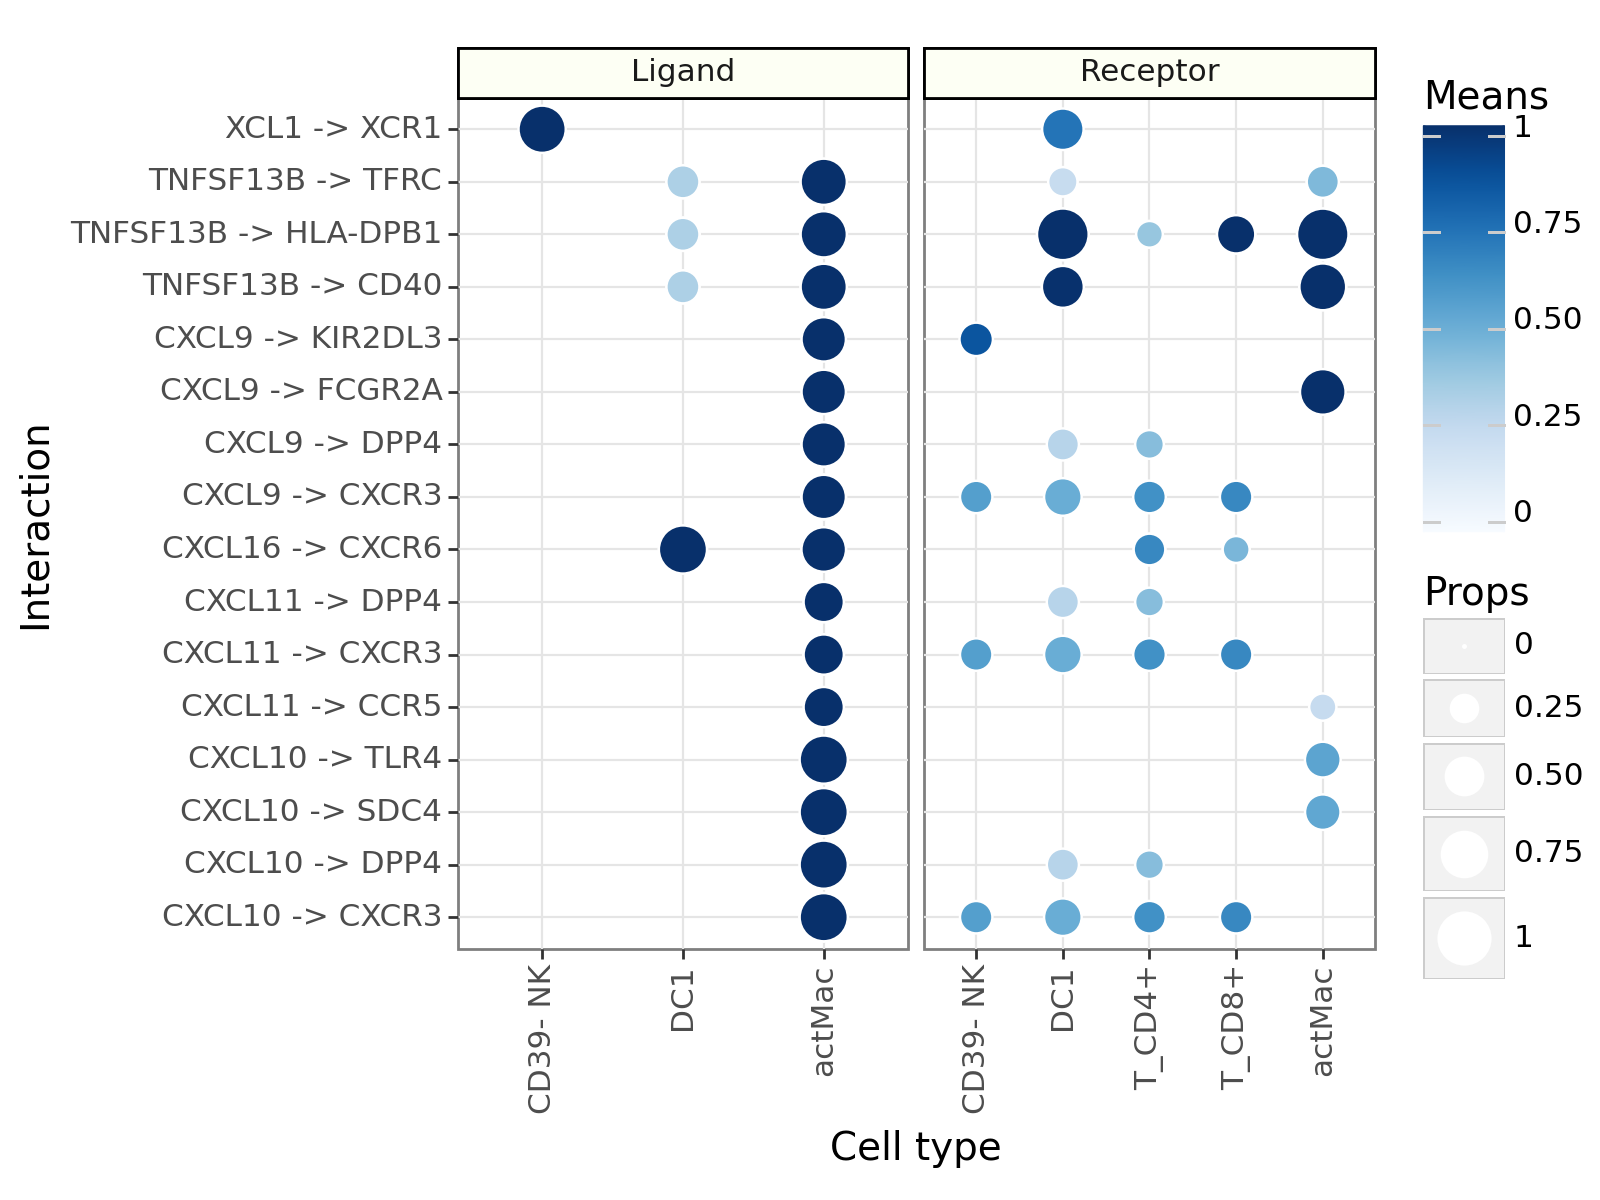

<Figure Size: (800 x 600)>

In [49]:
my_plot = tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill='means',
                         label='props',
                       cmap='Blues',
                         #label_fun=lambda x: f'{x:.2f}',
                         top_n=50,
                         orderby='cellphone_pvals',
                         orderby_ascending=True,
                        ligand_complex = ['CXCL9','CXCL10','CXCL11','XCL1','CXCL16','TNFSF13B','IFNG'],
                         source_labels=['actMac','CD39- NK','DC1'],
                        target_labels=['T_CD4+','T_CD8+','CD39- NK','DC1','actMac'],
                        uns_key='cpdb_res', # NOTE: default is 'liana_res'
                         source_title='Ligand',
                         target_title='Receptor',
                         figure_size=(8, 6)
                         )
my_plot.save("20250624_liana_hubcreation.svg", format="svg", width=8, height=6, units="in")
my_plot

/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 8 x 6 in image.
/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: 20250624_liana_hubcreation_all.svg
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


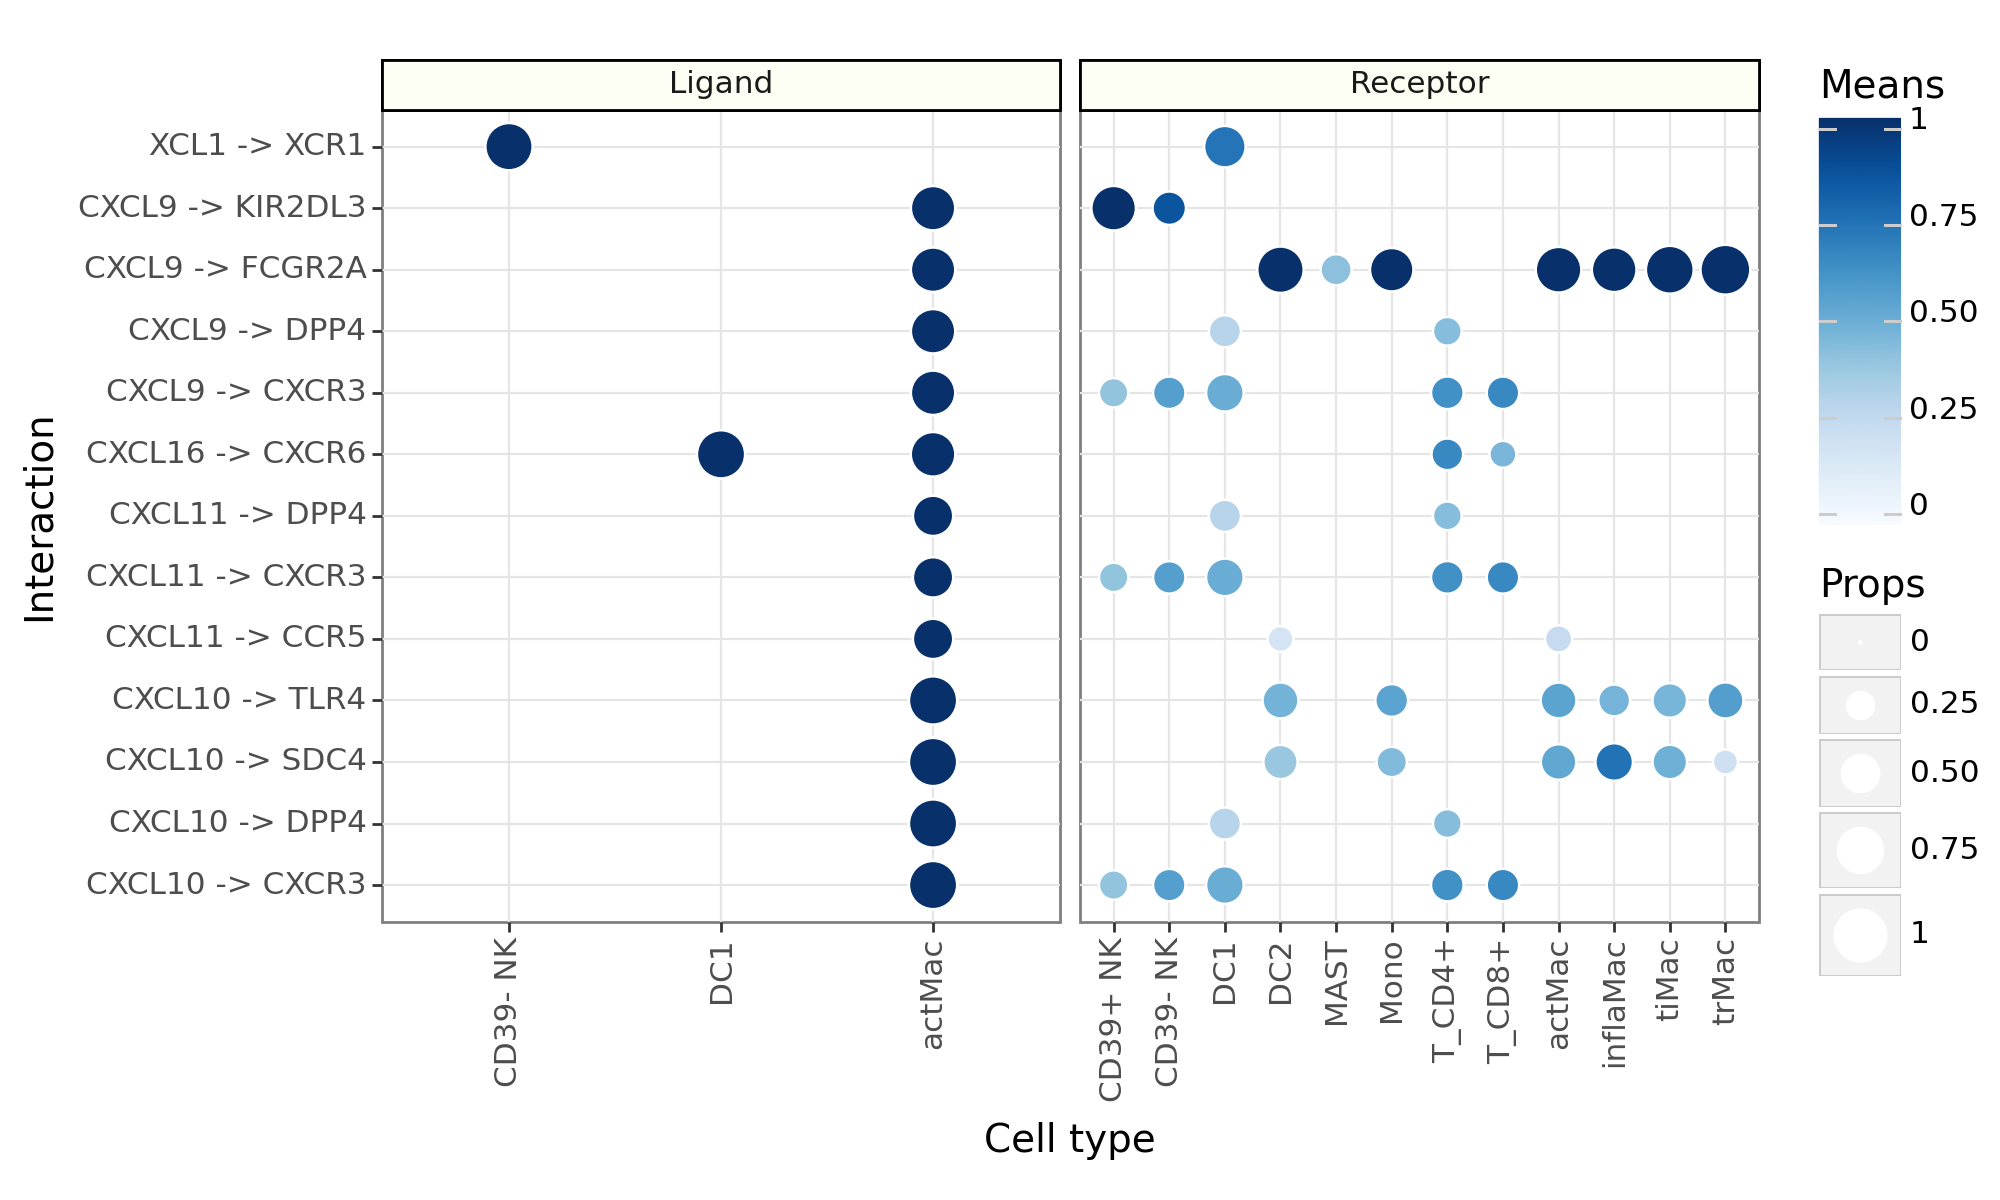

<Figure Size: (1000 x 600)>

In [38]:
my_plot = tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill='means',
                         label='props',
                       cmap='Blues',
                         #label_fun=lambda x: f'{x:.2f}',
                         top_n=50,
                         orderby='cellphone_pvals',
                         orderby_ascending=True,
                        ligand_complex = ['CXCL9','CXCL10','CXCL11','XCL1','CXCL16','IFNG'],
                         source_labels=['actMac','CD39- NK','DC1'],
                        target_labels=['T_CD4+','T_CD8+','CD39- NK','DC1','actMac','Mono','BCell','CD39+ NK','DC2','inflaMac','tiMac','trMac',
                                      'MAST'],
                        uns_key='cpdb_res', # NOTE: default is 'liana_res'
                         source_title='Ligand',
                         target_title='Receptor',
                         figure_size=(10, 6)
                         )
my_plot.save("20250624_liana_hubcreation_all.svg", format="svg", width=8, height=6, units="in")
my_plot

/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:587: PlotnineWarning: Saving 16 x 6 in image.
/home/anla12/anaconda3/envs/liana_env/lib/python3.8/site-packages/plotnine/ggplot.py:588: PlotnineWarning: Filename: 20250624_liana_hubcreation_all2.svg
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


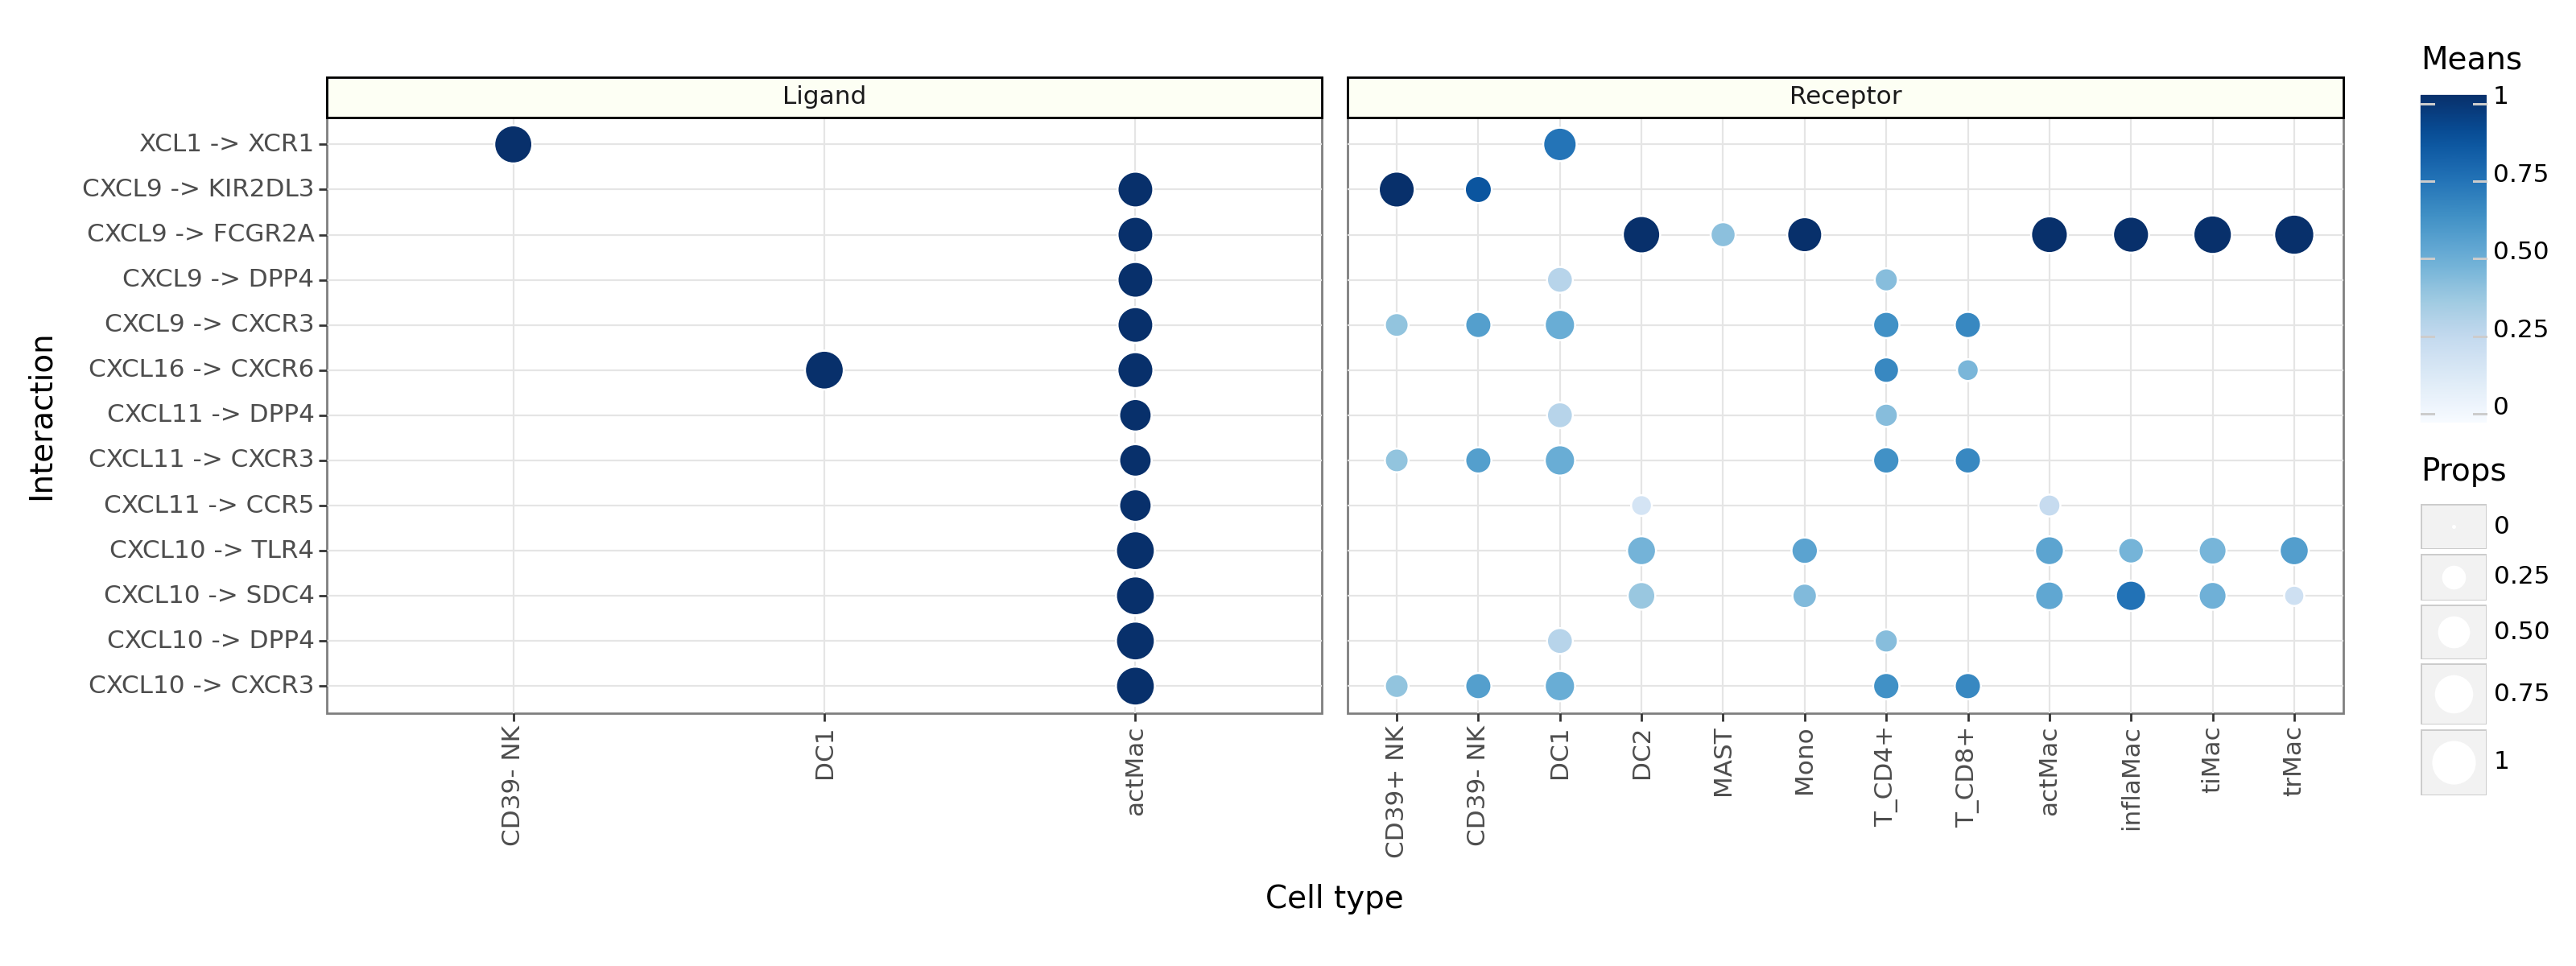

<Figure Size: (1600 x 600)>

In [40]:
my_plot = tileplot(adata = adata,
                         # NOTE: fill & label need to exist for both
                         # ligand_ and receptor_ columns
                         fill='means',
                         label='props',
                       cmap='Blues',
                         #label_fun=lambda x: f'{x:.2f}',
                         top_n=50,
                         orderby='cellphone_pvals',
                         orderby_ascending=True,
                        ligand_complex = ['CXCL9','CXCL10','CXCL11','XCL1','CXCL16','IFNG'],
                         source_labels=['actMac','CD39- NK','DC1'],
                        target_labels=['T_CD4+','T_CD8+','CD39- NK','DC1','actMac','Mono','BCell','CD39+ NK','DC2','inflaMac','tiMac','trMac',
                                      'MAST'],
                        uns_key='cpdb_res', # NOTE: default is 'liana_res'
                         source_title='Ligand',
                         target_title='Receptor',
                         figure_size=(16, 6)
                         )
my_plot.save("20250624_liana_hubcreation_all2.svg", format="svg", width=16, height=6, units="in")
my_plot